# Problem 2

In [16]:
import matplotlib.pyplot as plt

In [ ]:
TOTAL_DRIVERS = 4000
ITERATIONS = 1000
SWITCH_RATIO = 0.01


def path_times(flows, include_bridge=False):
    if not include_bridge:
        top, bottom = flows
        top_time = top / 100 + 45
        bottom_time = 45 + bottom / 100
        return [top_time, bottom_time]

    top, bottom, middle = flows

    flow_sa = top + middle
    flow_be = bottom + middle

    top_time = flow_sa / 100 + 45
    bottom_time = 45 + flow_be / 100
    middle_time = flow_sa / 100 + flow_be / 100
    return [top_time, bottom_time, middle_time]


def average_time(flows, times):
    total_drivers = sum(flows)
    if total_drivers == 0:
        return 0.0

    total_time = 0.0
    for f, t in zip(flows, times):
        total_time += f * t
    return total_time / total_drivers


def is_wardrop_equilibrium(flows, times, tol=1e-9):
    used_path_times = [times[i] for i in range(len(flows)) if flows[i] > 0]
    if not used_path_times:
        return True

    best_time = min(times)
    return all(t <= best_time + tol for t in used_path_times)


def index_of_fastest_path(times):
    fastest_idx = 0
    for i in range(1, len(times)):
        if times[i] < times[fastest_idx]:
            fastest_idx = i
    return fastest_idx


def index_of_slowest_occupied_path(flows, times):
    occupied = [i for i in range(len(flows)) if flows[i] > 0]
    if not occupied:
        return None

    slowest_idx = occupied[0]
    for i in occupied[1:]:
        if times[i] > times[slowest_idx]:
            slowest_idx = i
    return slowest_idx


def run_selfish_switching(initial_flows, include_bridge=False, iterations=ITERATIONS):
    flows = list(initial_flows)

    flow_history = [flows.copy()]
    time_history = []
    avg_history = []

    initial_times = path_times(flows, include_bridge=include_bridge)
    time_history.append(initial_times)
    avg_history.append(average_time(flows, initial_times))

    for _ in range(iterations):
        times = path_times(flows, include_bridge=include_bridge)

        slowest = index_of_slowest_occupied_path(flows, times)
        fastest = index_of_fastest_path(times)

        if slowest is not None and slowest != fastest:
            movers = int(SWITCH_RATIO * flows[slowest])
            movers = max(1, movers)
            movers = min(movers, flows[slowest])

            flows[slowest] -= movers
            flows[fastest] += movers

        new_times = path_times(flows, include_bridge=include_bridge)
        flow_history.append(flows.copy())
        time_history.append(new_times)
        avg_history.append(average_time(flows, new_times))

    return {
        "flows": flow_history,
        "times": time_history,
        "avg": avg_history,
    }


def print_report(result, include_bridge=False):
    labels = ["top (S-A-E)", "bottom (S-B-E)"]
    if include_bridge:
        labels.append("middle (S-A-B-E)")

    final_flows = result["flows"][-1]
    final_times = result["times"][-1]
    final_avg = result["avg"][-1]

    print("Final driver counts:")
    for label, count in zip(labels, final_flows):
        print(f"  {label}: {count}")

    print("\nFinal path travel times:")
    for label, t in zip(labels, final_times):
        print(f"  {label}: {t:.3f}")

    print(f"\nFinal average travel time: {final_avg:.3f}")
    print(f"Wardrop equilibrium? {is_wardrop_equilibrium(final_flows, final_times)}")


## part a

Part (a) report
Final driver counts:
  top (S-A-E): 2004
  bottom (S-B-E): 1996

Final path travel times:
  top (S-A-E): 65.040
  bottom (S-B-E): 64.960

Final average travel time: 65.000
Wardrop equilibrium? False


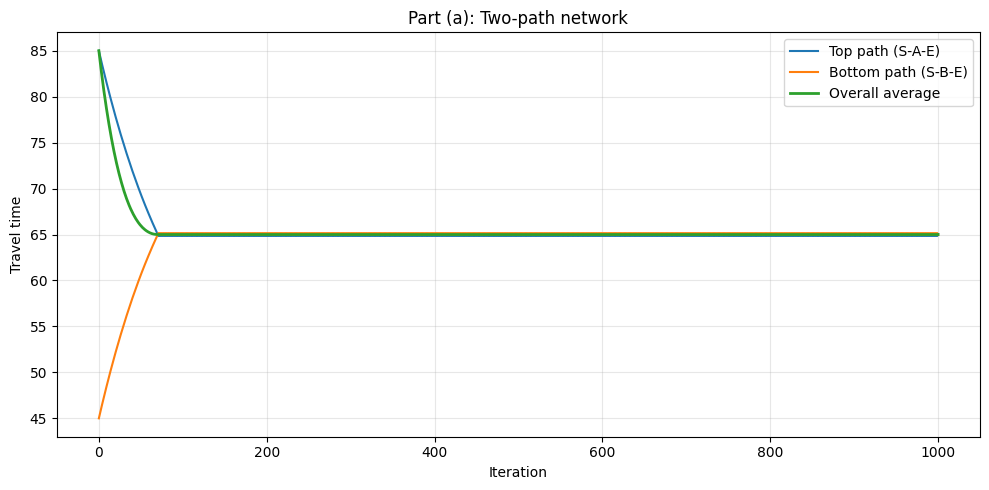

In [18]:
part_a = run_selfish_switching(
    initial_flows=[TOTAL_DRIVERS, 0],
    include_bridge=False,
)

print("Part (a) report")
print("=" * 40)
print_report(part_a, include_bridge=False)

iters_a = list(range(len(part_a["avg"])))
top_times_a = [times[0] for times in part_a["times"]]
bottom_times_a = [times[1] for times in part_a["times"]]

plt.figure(figsize=(10, 5))
plt.plot(iters_a, top_times_a, label="Top path (S-A-E)")
plt.plot(iters_a, bottom_times_a, label="Bottom path (S-B-E)")
plt.plot(iters_a, part_a["avg"], label="Overall average", linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Travel time")
plt.title("Part (a): Two-path network")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## part b

Part (b) report
Final driver counts:
  top (S-A-E): 0
  bottom (S-B-E): 0
  middle (S-A-B-E): 4000

Final path travel times:
  top (S-A-E): 85.000
  bottom (S-B-E): 85.000
  middle (S-A-B-E): 80.000

Final average travel time: 80.000
Wardrop equilibrium? True


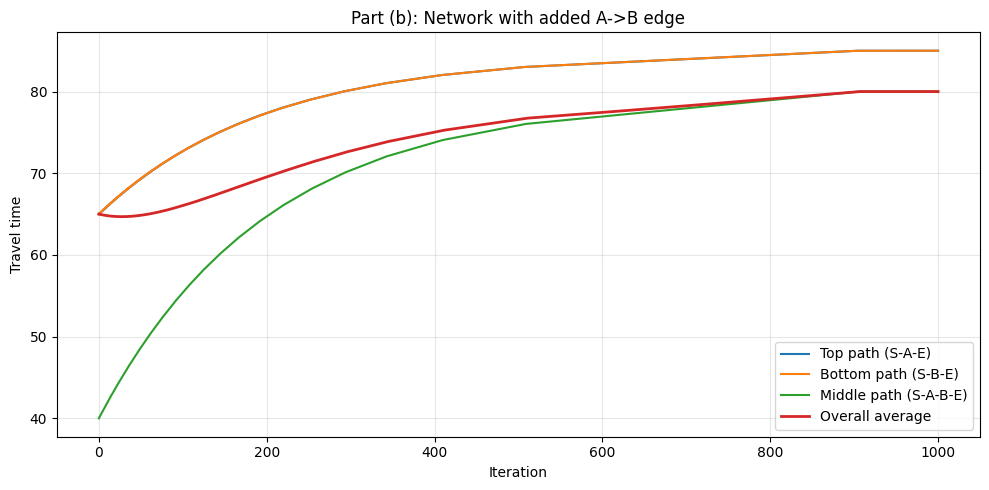


Average travel time increased: 65.000 -> 80.000


In [19]:
# Start from final distribution of part (a)
final_a_top, final_a_bottom = part_a["flows"][-1]

part_b = run_selfish_switching(
    initial_flows=[final_a_top, final_a_bottom, 0],
    include_bridge=True,
)

print("Part (b) report")
print("=" * 40)
print_report(part_b, include_bridge=True)

iters_b = list(range(len(part_b["avg"])))
top_times_b = [times[0] for times in part_b["times"]]
bottom_times_b = [times[1] for times in part_b["times"]]
middle_times_b = [times[2] for times in part_b["times"]]

plt.figure(figsize=(10, 5))
plt.plot(iters_b, top_times_b, label="Top path (S-A-E)")
plt.plot(iters_b, bottom_times_b, label="Bottom path (S-B-E)")
plt.plot(iters_b, middle_times_b, label="Middle path (S-A-B-E)")
plt.plot(iters_b, part_b["avg"], label="Overall average", linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Travel time")
plt.title("Part (b): Network with added A->B edge")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

final_avg_a = part_a["avg"][-1]
final_avg_b = part_b["avg"][-1]
trend = "increased" if final_avg_b > final_avg_a else "decreased"
print(f"\nAverage travel time {trend}: {final_avg_a:.3f} -> {final_avg_b:.3f}")
